In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
ordata = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Dataset\\Orange.csv')
ordata.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [3]:
ordata.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [4]:
ordata.shape

(241, 11)

In [5]:
ordata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [6]:
ordata.isnull().any()

Size (cm)             False
Weight (g)            False
Brix (Sweetness)      False
pH (Acidity)          False
Softness (1-5)        False
HarvestTime (days)    False
Ripeness (1-5)        False
Color                 False
Variety               False
Blemishes (Y/N)       False
Quality (1-5)         False
dtype: bool

In [7]:
ordata.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


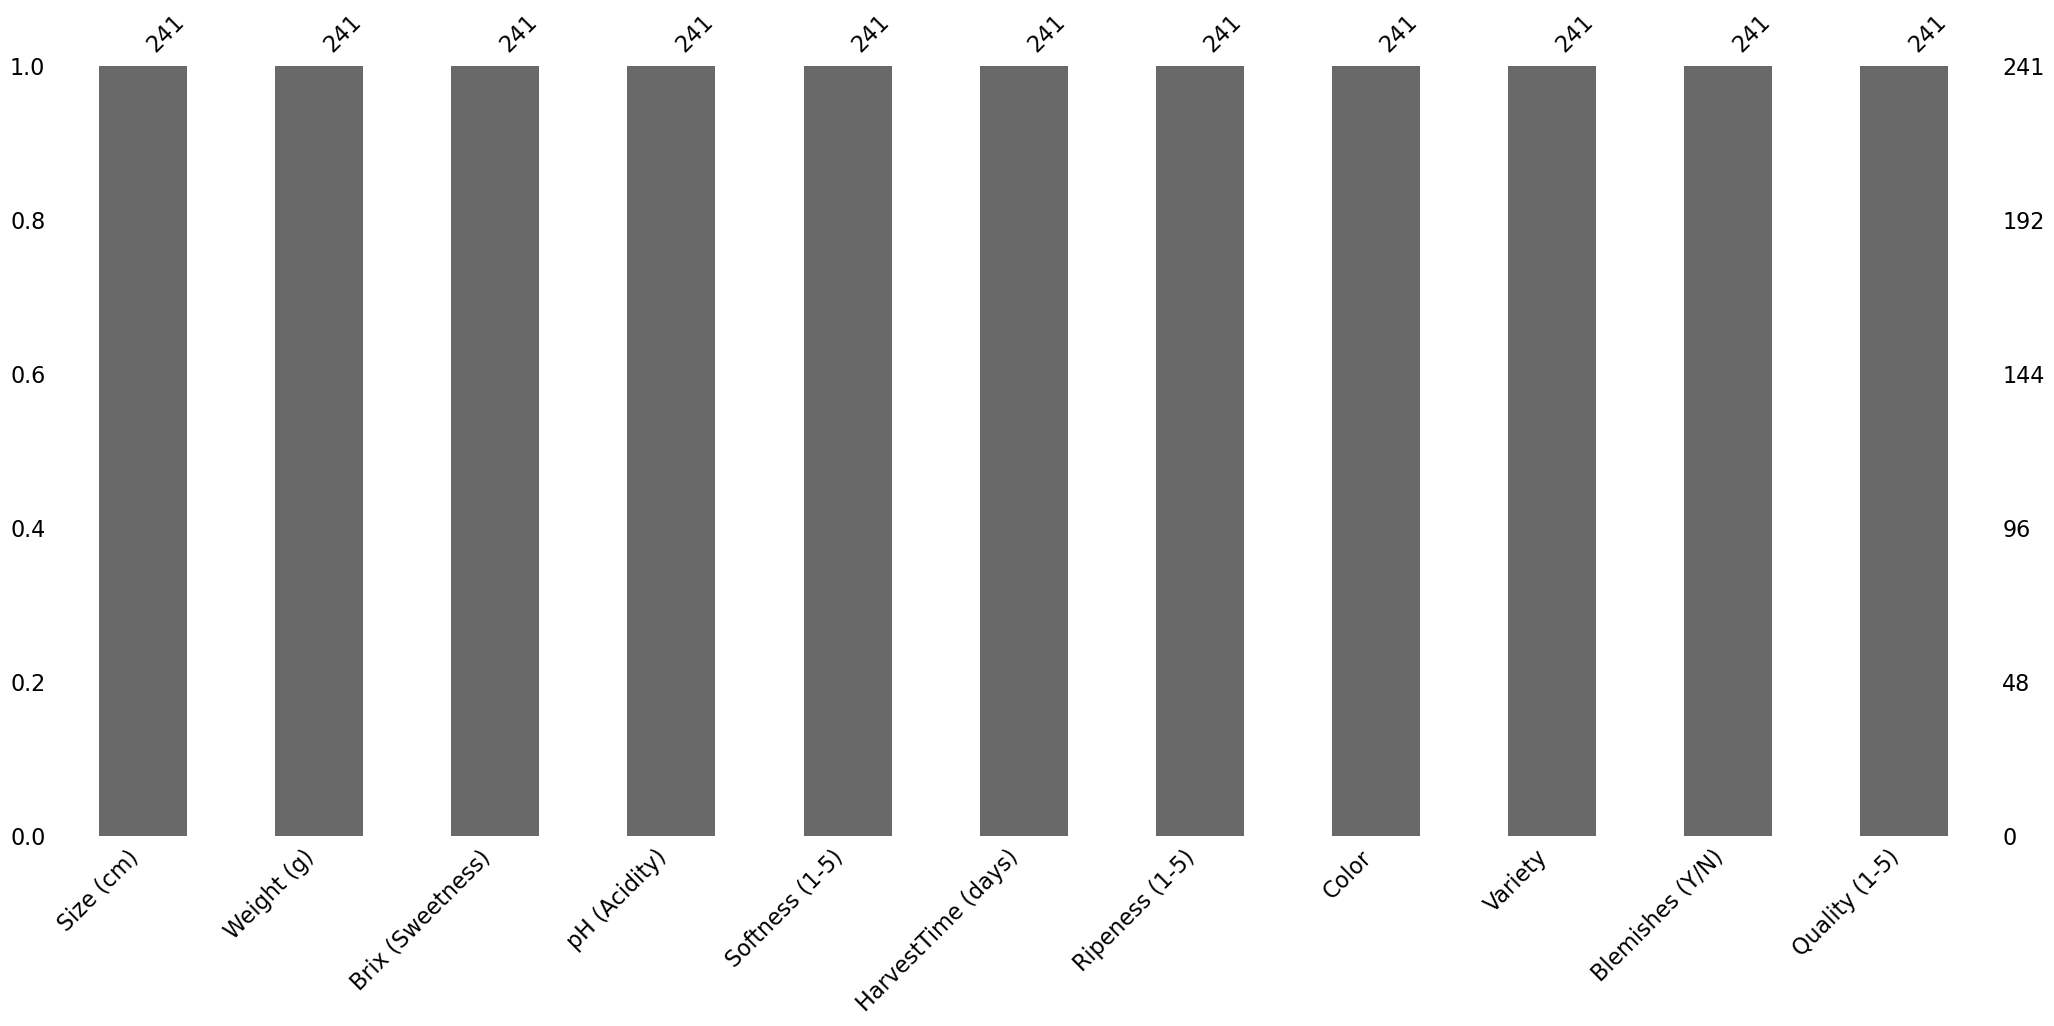

In [8]:
msno.bar(ordata);

In [9]:
sns.set()

<Axes: xlabel='Size (cm)', ylabel='Density'>

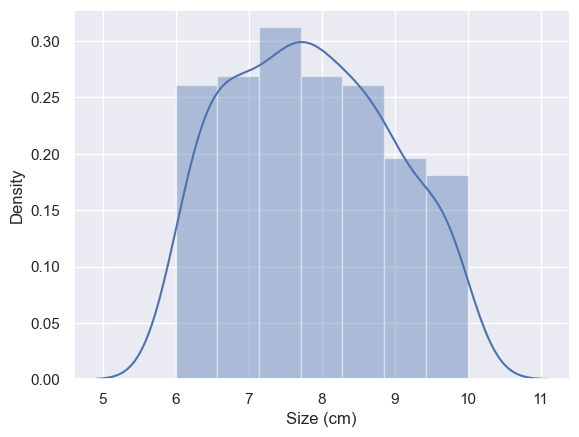

In [10]:
sns.distplot(ordata['Size (cm)'])

<Axes: xlabel='Weight (g)', ylabel='Density'>

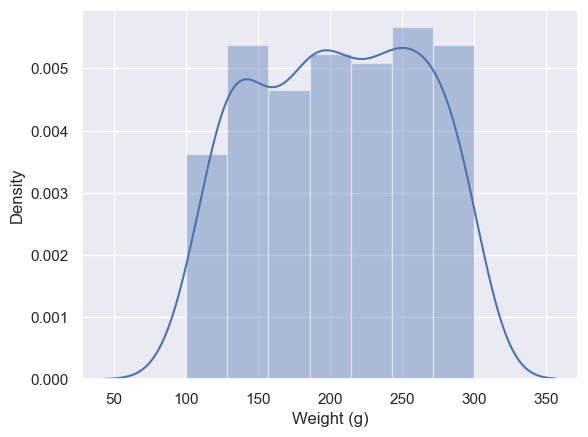

In [11]:
sns.distplot(ordata['Weight (g)'])

<Axes: xlabel='Brix (Sweetness)', ylabel='Density'>

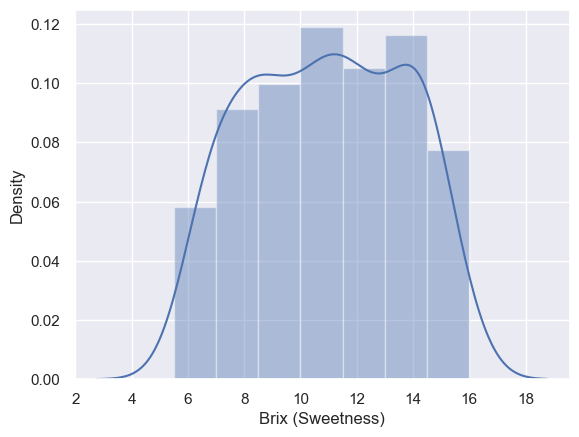

In [12]:
sns.distplot(ordata['Brix (Sweetness)'])

<Axes: xlabel='pH (Acidity)', ylabel='Density'>

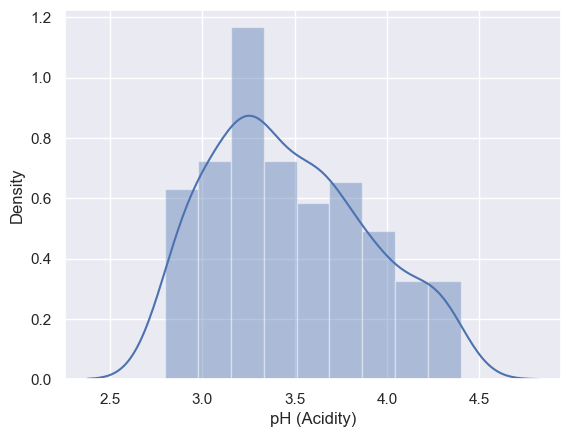

In [13]:
sns.distplot(ordata['pH (Acidity)'])

<Axes: xlabel='Softness (1-5)', ylabel='Density'>

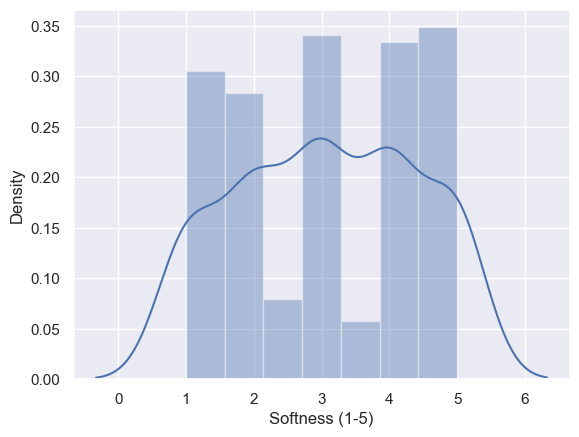

In [14]:
sns.distplot(ordata['Softness (1-5)'])

<Axes: xlabel='HarvestTime (days)', ylabel='Density'>

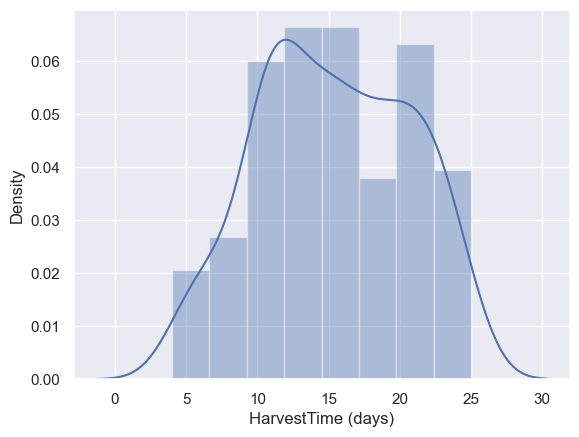

In [15]:
 sns.distplot(ordata['HarvestTime (days)'])

<Axes: xlabel='Ripeness (1-5)', ylabel='Density'>

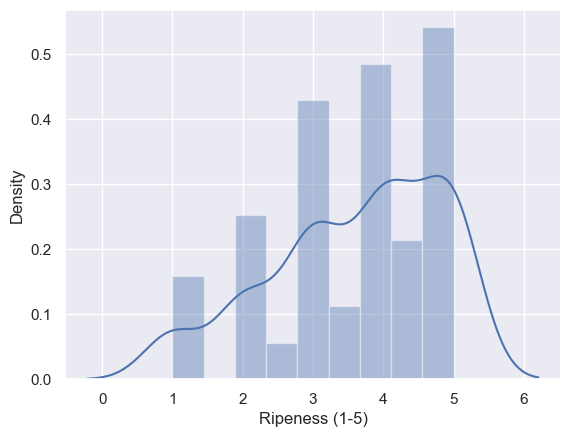

In [16]:
 sns.distplot(ordata['Ripeness (1-5)'])

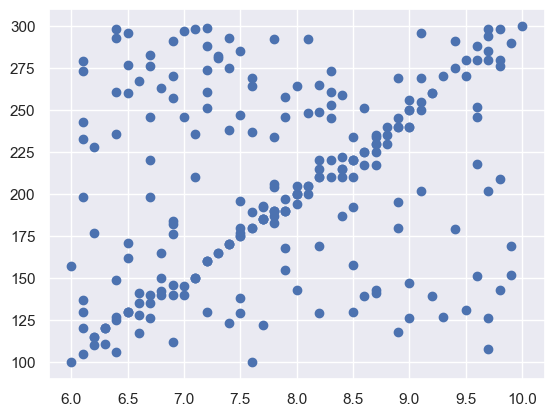

In [17]:
plt.scatter(ordata['Size (cm)'], ordata['Weight (g)'])

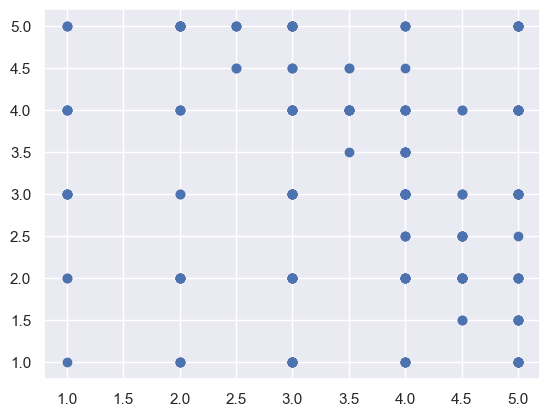

In [18]:
plt.scatter(ordata['Ripeness (1-5)'], ordata['Softness (1-5)'])

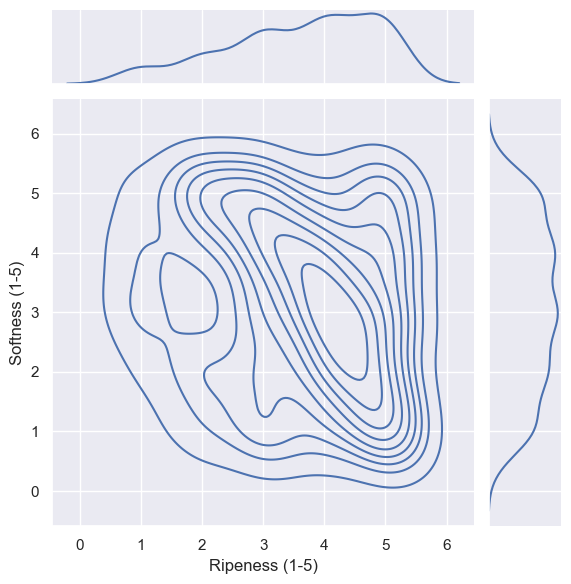

In [19]:
import seaborn as sns
sns.jointplot(x='Ripeness (1-5)', y='Softness (1-5)', data=ordata, kind="kde")


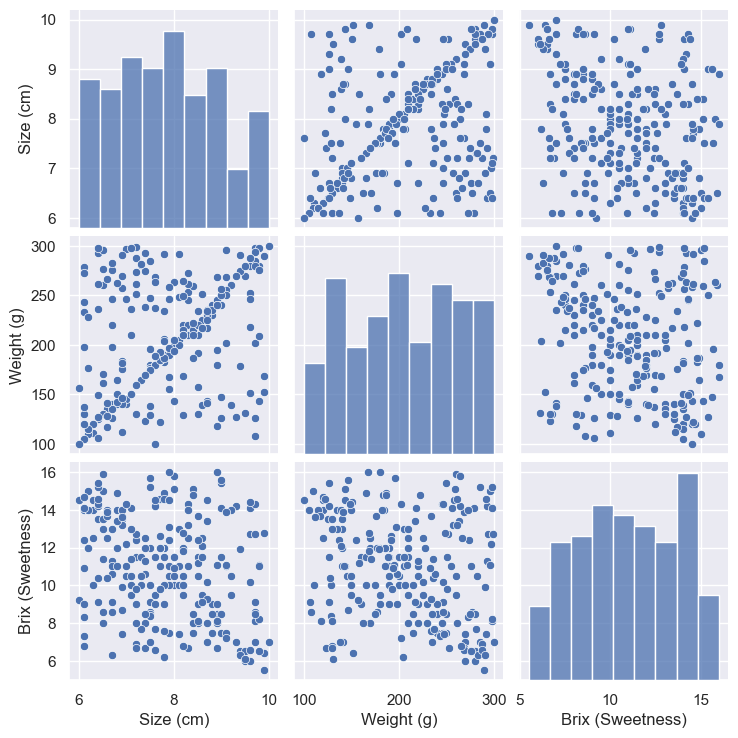

In [20]:
import seaborn as sns
sns.pairplot(ordata[['Size (cm)', 'Weight (g)', 'Brix (Sweetness)']])


In [21]:
ordata.columns = [col.split(' ')[0] for col in ordata.columns.to_list()]

In [22]:
ordata['Blemishes'] = ordata['Blemishes'].apply(lambda x: x.split(' ')[0])

In [23]:
# Split data into features and target
X = ordata[['Size', 'Weight', 'Brix', 'pH', 'Softness', 'HarvestTime', 'Ripeness']]
y = ordata['Quality']

In [24]:
param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.2]
}


In [25]:
xgb_model = XGBRegressor(random_state=47)

In [26]:
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=47, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [400, 500, 600]},
             scoring='r2')

In [27]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best R-squared score:", grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400}
Best R-squared score: 0.3061092255427274


In [28]:
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X)


In [29]:
y_pred

array([4.0122166 , 4.5216694 , 5.00875   , 3.5037124 , 4.5163727 ,
       1.0423206 , 4.0848556 , 4.532104  , 3.0272412 , 4.980776  ,
       2.505406  , 4.0083933 , 4.518397  , 4.9962034 , 3.989895  ,
       4.9988785 , 3.5897324 , 4.0020323 , 2.0088766 , 4.5601583 ,
       2.994659  , 5.027657  , 4.4339237 , 2.0116181 , 4.524674  ,
       4.019074  , 4.990222  , 3.997083  , 1.0563987 , 3.0279486 ,
       4.429303  , 4.417184  , 4.9818125 , 3.936478  , 4.9969573 ,
       3.5861247 , 4.9679875 , 2.5118773 , 4.427613  , 3.9861736 ,
       4.500444  , 4.992783  , 4.438613  , 5.001805  , 5.005349  ,
       4.9818125 , 4.395266  , 4.488997  , 2.9625223 , 4.9935746 ,
       3.497034  , 5.0001373 , 4.4326415 , 2.0067523 , 4.4537826 ,
       4.0004516 , 4.4933705 , 4.9974604 , 4.5371065 , 4.986063  ,
       4.9894686 , 2.9890907 , 4.512448  , 4.9987426 , 4.020181  ,
       5.0000205 , 3.9722233 , 3.598881  , 2.4939773 , 4.986062  ,
       3.5809402 , 4.9951973 , 4.449778  , 4.490366  , 2.97981

In [30]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

In [31]:
print('MAE:', mae)
print('RMSE:', rmse)
print('MSE:', mse)
print('R2 Score:', r2)

MAE: 0.018562636929428923
RMSE: 0.029500288748044317
MSE: 0.0008702670362179901
R2 Score: 0.9991507589218472


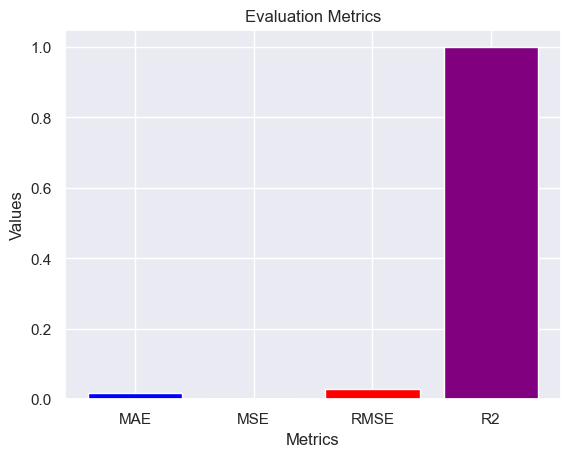

In [32]:
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae, mse, rmse, r2]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

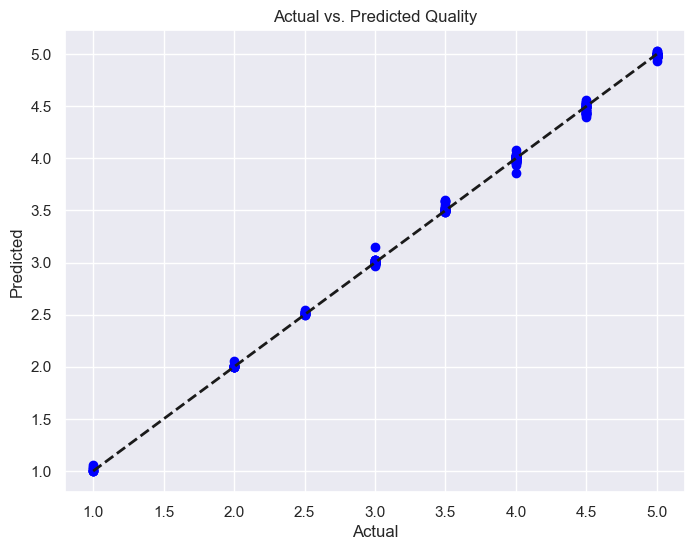

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Quality')
plt.show()